# Implementasi Klasifikasi Gambar menggunakan CNN's

Langkah-langkah Data Pre-processing:

In [1]:
# Mengimport Library yang dibutuhkan

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow dan tf.keras
import tensorflow as tf
from tensorflow import keras

# Library pembantu
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Menampilkan ukuran dari data Training
print("Jumlah Gambar Pelatihan :"+str(train_images.shape))
# Menampilkan ukuran dari Training Label
print("Jumlah Label Pelatihan :"+str(train_labels.shape))

# Menampilkan ukuran data Testing 
print("Jumlah Gambar Uji :"+str(test_images.shape))
# Menampilkan ukuran data Label Testing 
print("Jumlah Label Uji :"+str(test_labels.shape))

# Menampilkan output
print("Kumpulan Label Pelatihan :"+str(train_labels))
# Data Label Uji
print("Kumpulan Label Uji :"+str(test_labels))

# Proses Normalisasi gambar
train_images = train_images / 255.0
test_images = test_images / 255.0

Jumlah Gambar Pelatihan :(50000, 32, 32, 3)
Jumlah Label Pelatihan :(50000, 1)
Jumlah Gambar Uji :(10000, 32, 32, 3)
Jumlah Label Uji :(10000, 1)
Kumpulan Label Pelatihan :[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Kumpulan Label Uji :[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [3]:
# Bentuk ulang data input dari (32, 32) menjadi (32, 32, 1)
w, h = 32, 32
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)

In [40]:
###### from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Menentukan bentuk input di lapisan pertama jaringan saraf
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))
# Lapisan Konvolusi Kedua
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# Lapisan Fully Connected
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Melihat ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

### Kompilasi Model



In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Melatih Model


In [44]:
model.fit(train_images, train_labels,batch_size=32 ,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7073 - accuracy: 0.7499
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6793 - accuracy: 0.7598
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6471 - accuracy: 0.7716
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6357 - accuracy: 0.7748
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6232 - accuracy: 0.7793
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5996 - accuracy: 0.7827
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5783 - accuracy: 0.7891
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5693 - accuracy: 0.7956
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5679 - accuracy: 0.7937
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.547

In [45]:
# Mengevaluasi Model menggunakan Test Set

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {test_acc:0.2f}')
print(f'\ntest_loss: {test_loss:0.2f}')

313/313 - 0s - loss: 0.7363 - accuracy: 0.7507

Test accuracy: 0.75

test_loss: 0.74


## Membuat Prediksi: 

In [46]:
# Membuat prediksi dari data test_images

predictions = model.predict(test_images)

In [47]:
# Mengubah input data dari (28, 28) menjadi (28, 28, 1)
w, h = 32, 32
train_images = train_images.reshape(train_images.shape[0], w, h, 3)
test_images = test_images.reshape(test_images.shape[0], w, h, 3)


# Fungsi bantuan untuk Visualisasi gambar 
def plot_image(i, predictions_array, true_label, img):
  predictions_array,true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [48]:
import numpy as np
test_labels=np.ravel(test_labels)
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

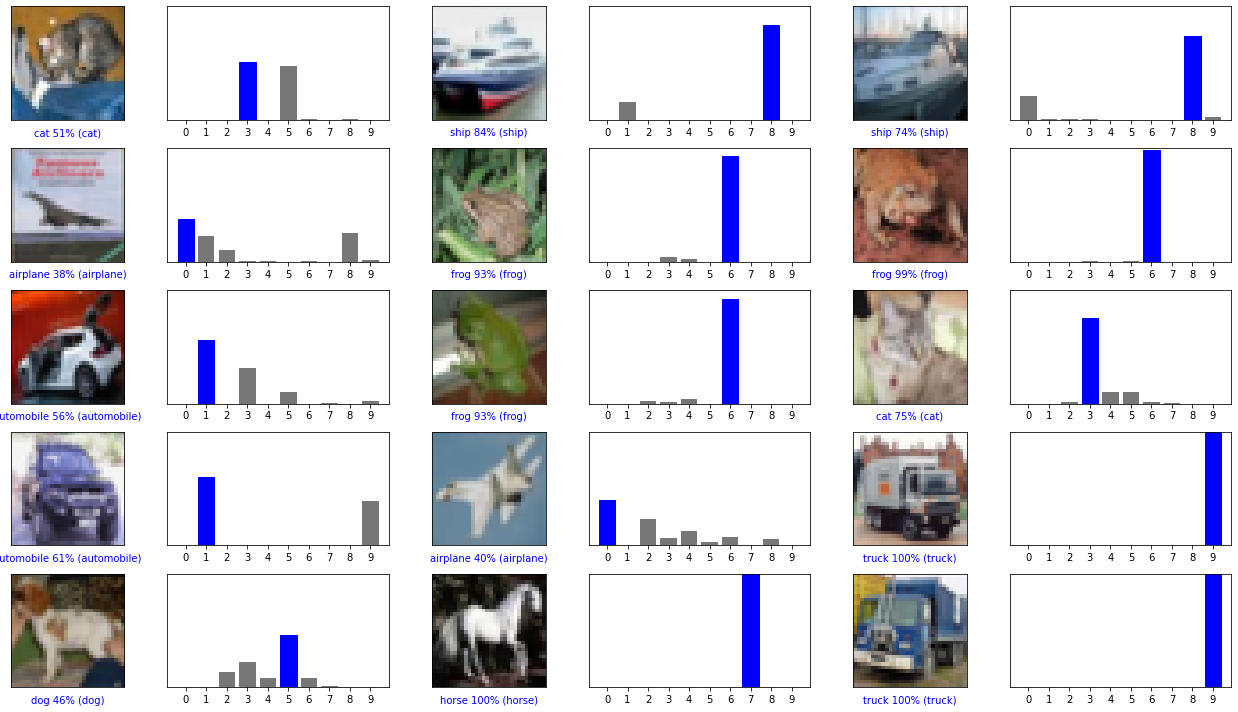

In [49]:
# Plot X gambar pertama pada test_images, label hasil prediksi , dan label yang sebenarnya.
# Warnai prediksi yang benar dengan warna biru dan prediksi yang salah dengan warna merah.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


### Kesimpulan: 

Menjalankan kedua model selama 5 Epochs, berikut adalah tabel perbandingannya: 

|  Model   | Train Accuracy  | Train Loss  | Test Accuracy | Test Loss |
|----------|-----------------|-------------|---------------|-----------|
| Fully connected Neural Networks -After 10 Epochs |           0.8497 |       0.7051 |       0.71 |     0.85 | 
 

